   # Лабораторная работа 324
   ### Биполярный транзистор.

**Цель работы:** 
*Определить основные характеристики, описывающие работу биполярного транзистора, по экспериментально полученным зависимостям тока и напряжения в цепи.*

In [108]:
import __init__
import numpy as np
import scipy as S
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib import rcParams
rcParams['figure.dpi'] = 100

### Упражнение 1: Изучение входной характеристики транзистора.

<img src="Схема1.png" width="700">
Экспериментальнык данные:

In [109]:
loaded_data1 = np.loadtxt('Data1.txt')
loaded_data = loaded_data1[loaded_data1[:, 0] > 0.5]
loaded_data

array([[0.6 , 0.04],
       [0.62, 0.12],
       [0.64, 0.21],
       [0.66, 0.46],
       [0.68, 0.85],
       [0.7 , 1.03]])

Построение графика и его обработка с помощью метода наименьших квадратов:

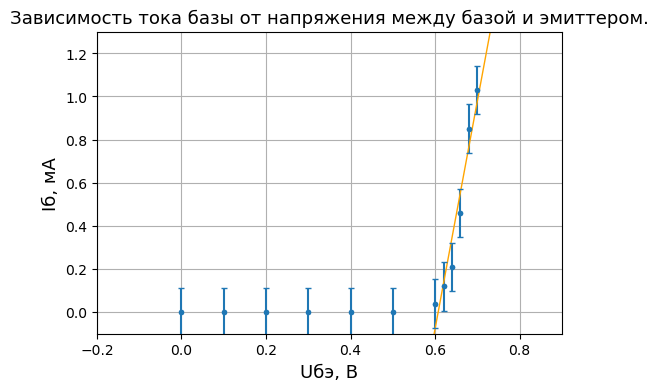

Результат МНК:
k = 10.557142857142873 ± 1.3484180703761801
b = -6.410476190476217 ± 0.8776810302893138


In [110]:
def mnk(loaded_data):
    N = loaded_data.shape[0]
    x = loaded_data[:,0]
    y = loaded_data[:,1]
    
    mx = x.sum()
    my = y.sum()
    a2 = np.dot(x.T, x)
    a1 = np.dot(x.T, y)
    
    k = (N*a1 - mx*my)/(N*a2 - mx**2)
    b = (a2*my - mx*a1)/(N*a2 - mx**2)
    s0 = np.dot((y-k*x-b).T, (y-k*x-b))/(N-2)
    dk = (s0*N/(N*a2 - mx**2))**(1/2)
    db = (s0*a2/(N*a2 - mx**2))**(1/2)
    f = np.array([k*z+b for z in range(N)])
    return k, dk, b, db, f, s0

k, dk, b, db, f, s0 = mnk(loaded_data)
plt.ylabel('Iб, мА', fontsize=13)
plt.xlabel('Uбэ, В', fontsize=13)
plt.xlim(-0.2, 0.9)
plt.ylim(-0.1, 1.3)
plt.title('Зависимость тока базы от напряжения между базой и эмиттером.', fontsize=13)
plt.plot(f, c='orange', lw = 1)
plt.scatter(loaded_data1[:,0], loaded_data1[:,1], s=8)
plt.errorbar(loaded_data1[:,0], loaded_data1[:,1], yerr=s0**(1/2), fmt='.', capsize=2, capthick=1);
plt.grid(True)
plt.show()
print ('Результат МНК:')
print ("k =", k, "±", dk)
print ("b =", b, "±", db)

Для нахождения значения порога срабатывания вычислим точку пересечения аппроксимирующей прямой с осью абсцисс: 

In [111]:
print ("Порог срабатывания: U =",-b/k, "Вольт")

Порог срабатывания: U = 0.6072169598556624 Вольт


### Упражнение 2: Изучение переходной характеристики транзистора

<img src="Схема2.png" width="600">
Загрузка и вывод экспериментальных данных:

In [121]:
loaded_data = np.loadtxt('Data2.txt')
loaded_data

array([[0.000e+00, 0.000e+00],
       [1.000e-01, 2.560e+01],
       [2.000e-01, 5.350e+01],
       [3.000e-01, 8.050e+01],
       [4.000e-01, 1.084e+02],
       [5.000e-01, 1.332e+02],
       [6.000e-01, 1.638e+02],
       [7.000e-01, 1.883e+02],
       [8.000e-01, 2.200e+02]])

Построение графика и его обработка с помощью метода наименьших квадратов:

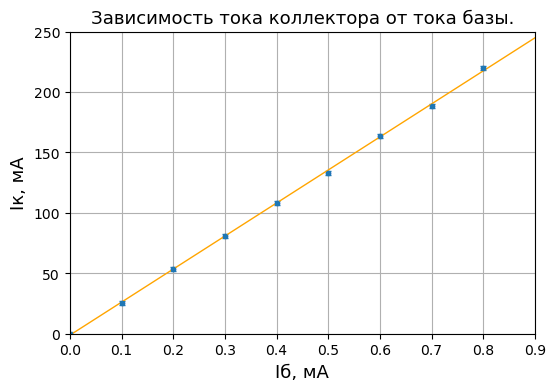

Результат МНК:
k = 273.5666666666666 ± 2.056902175808695
b = -1.2822222222221755 ± 0.9792813115367907


In [113]:
k, dk, b, db, f, s0 = mnk(loaded_data)

plt.ylabel('Iк, мА', fontsize=13)
plt.xlabel('Iб, мА', fontsize= 13)
plt.xlim(0, 0.9)
plt.ylim(-0.1, 250)
plt.title('Зависимость тока коллектора от тока базы.', fontsize=13)
plt.scatter(loaded_data[:,0], loaded_data[:,1], s=8, c='blue')
plt.errorbar(loaded_data[:,0], loaded_data[:,1], yerr=s0**(1/2), fmt='.', capsize=2, capthick=1);
plt.plot(f, c='orange', lw = 1)
plt.grid(True)
plt.show()
print ('Результат МНК:')
print ("k =", k, "±", dk)
print ("b =", b, "±", db)

In [114]:
print ("Коэффициент усиления биполярного транзистора:", k, "±", dk)

Коэффициент усиления биполярного транзистора: 273.5666666666666 ± 2.056902175808695


Сделаем оценку величины $\frac{W}{D}$, где $W$ – толщина базы, а $D$ – диффузионная длина для неосновных носителей базы: $$\alpha=\frac{1-W^2}{2D^2};⠀\alpha=\frac{I_к}{I_э}=\frac{I_к}{I_к+I_б};⠀\frac{I_к}{I_б}=\beta \implies \frac{W}{D}=\sqrt{\frac{2}{1+\beta}}$$ 

In [115]:
print ("Оценка отношения толщины базы к диффузионной длине неосновных зарядов:", ((2/(1+k))**(1/2)))

Оценка отношения толщины базы к диффузионной длине неосновных зарядов: 0.0853475565824394


### Упражнение 3: Изучение выходной характеристики транзистора.

<img src="Схема3.png" width="700">
Загрузка и вывод данных из текстового файла:

In [116]:
loaded_data = np.loadtxt('Data3.txt')
loaded_data

array([[ 0.21, 19.2 ],
       [ 0.26, 25.2 ],
       [ 0.31, 30.4 ],
       [ 0.36, 35.7 ],
       [ 0.41, 41.  ],
       [ 0.46, 45.7 ],
       [ 0.51, 50.2 ],
       [ 0.56, 55.5 ],
       [ 0.61, 60.3 ],
       [ 0.66, 65.8 ],
       [ 0.71, 70.5 ],
       [ 0.76, 75.3 ]])

Построим график зависимости тока от напряжения:

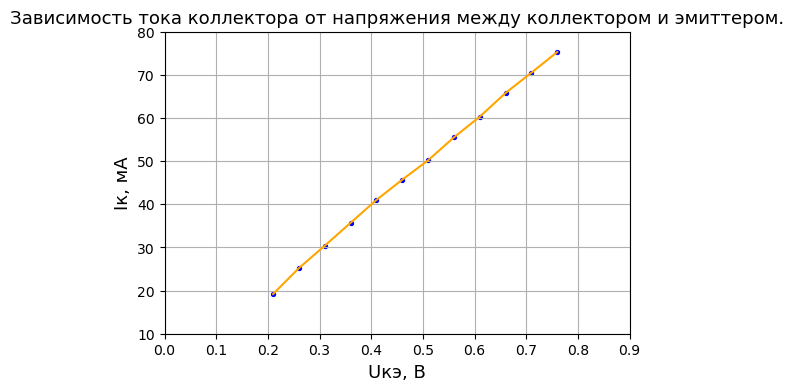

In [117]:
plt.ylabel('Iк, мА', fontsize=13)
plt.xlabel('Uкэ, В', fontsize=13)
plt.xlim(0, 0.9)
plt.ylim(10, 80)
plt.title('Зависимость тока коллектора от напряжения между коллектором и эмиттером.', fontsize=13)
plt.plot(loaded_data[:,0], loaded_data[:,1], c = 'orange')
plt.scatter(loaded_data[:,0], loaded_data[:,1], s=8, c='blue')
plt.grid(True)
plt.show()

Вычислим теперь значения мощности на транзисторе для каждой точки, которая определяется по формуле: $$P=U*I$$

In [119]:
loaded_data[:,1] = loaded_data[:,0]*loaded_data[:,1]
loaded_data

array([[ 0.21 ,  4.032],
       [ 0.26 ,  6.552],
       [ 0.31 ,  9.424],
       [ 0.36 , 12.852],
       [ 0.41 , 16.81 ],
       [ 0.46 , 21.022],
       [ 0.51 , 25.602],
       [ 0.56 , 31.08 ],
       [ 0.61 , 36.783],
       [ 0.66 , 43.428],
       [ 0.71 , 50.055],
       [ 0.76 , 57.228]])

Построим график зависимости мощности от напряжения:

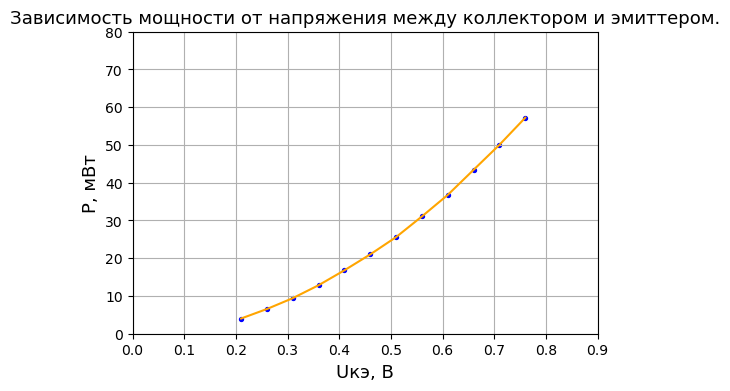

In [120]:
plt.ylabel('P, мВт', fontsize=13)
plt.xlabel('Uкэ, В', fontsize=13)
plt.xlim(0, 0.9)
plt.ylim(0, 80)
plt.title('Зависимость мощности от напряжения между коллектором и эмиттером.', fontsize=13)
plt.plot(loaded_data[:,0], loaded_data[:,1], c='orange')
plt.scatter(loaded_data[:,0], loaded_data[:,1], s=8, c='blue')
plt.grid(True)
plt.show()

In [71]:
print ("Максимальное значение мощности по графику: P = (57,2 ± 4,2)мВт")

Максимальное значение мощности по графику: P = 57,2 ± 4,2


**Результаты работы:** 
+ В результате выполненной работы был изучен биполярный транзистор и принцип его работы. В ходе работы были изучены входная, переходная и выходная характеристики транзистора
    * В упражнении 1 по графику зависимости тока базы от напряжения между базой и эмиттером было определено значения порога   срабатывания: $$U = (0.61 ± 0,05) В$$
    * В упражнении 2 по графику зависимости тока коллектора от тока базы был определён коэффицент усиления биполярного транзистора: $$\beta = (253,57 ± 2,07)$$ Также, было оценено отношение толщины базы к диффузионной длине неосновных зарядов:  $$\frac{W}{D}=\sqrt{\frac{2}{1+\beta}} = 0.085$$ 
    * В упражнении 3 было определено максимальное значение мощности, выделенной на транзисторе: $$P = (57,2 ± 4,2)мВт$$
    
    

Источник: [Методичка к практикуму №324](http://genphys.phys.msu.ru/rus/lab/elmag/Lab324_2021.pdf "Прак №324")